In [302]:
# Observations  Insights 
# As the timepoint passes the mice had seen their tumor size go down when using cap.
# Study seems fair - there are equal parts male to female sitting at 49 - 50 % 
# there may be a correlation to weight and tumor size - possibly obesity playing a role? 

## Dependencies and starter code

In [303]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [304]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# calculate stats for mean median var and stdv
mean = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# create df 
stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
# print df
stats_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

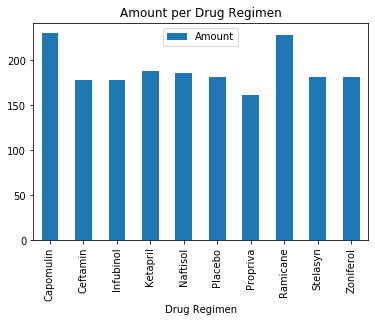

In [305]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
group_df = pd.DataFrame(merged.groupby(["Drug Regimen"]).count()).reset_index()
# set to only these columns 
drugRegimen = group_df[["Drug Regimen","Mouse ID"]]
drugRegimen = drugRegimen.rename(columns={"Mouse ID": "Amount"})
drugRegimen = drugRegimen.set_index("Drug Regimen")
# create bg 
drugRegimen.plot(kind="bar")
#set bg title 
plt.title("Amount per Drug Regimen")
#print bg 
plt.show()


<BarContainer object of 10 artists>

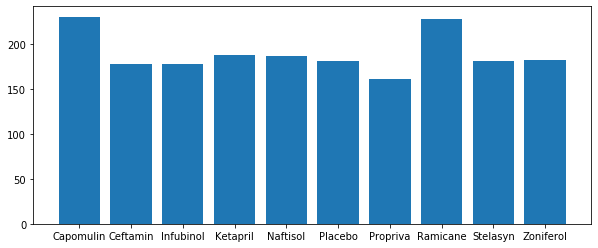

In [306]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# convert data into lists
drugRegimenplt = summary_df.index.tolist()
regCount = (merged.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = np.arange(len(regCount))
x_axis = drugRegimenplt
# Create a bg based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regCount)



## Pie plots

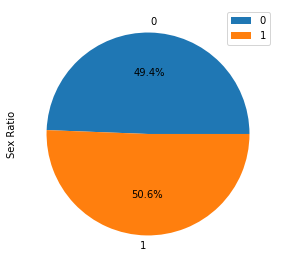

In [307]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# generate df for sex data 
sex_df = pd.DataFrame(merged.groupby(["Sex"]).count()).reset_index()
#set data for only these columns 
sex_df = sex_df[["Sex","Mouse ID"]]
sex_df = sex_df.rename(columns={"Mouse ID": "Sex Ratio"})
# generate pie plot and set ratios 
plt.figure(figsize=(10,12))
ax1 = plt.subplot(121, aspect='equal')
# format to percentages and set title 
sex_df.plot(kind='pie', y = "Sex Ratio", ax=ax1, autopct='%1.1f%%')



([<matplotlib.patches.Wedge at 0x1a296de250>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Females'),
  Text(1.0997996703027118, -0.020992503472586254, 'Males')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.4%'),
  Text(0.5998907292560246, -0.0114504564395925, '50.6%')])

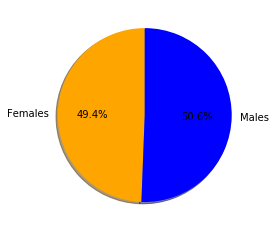

In [308]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexPie = (merged.groupby(["Sex"])["Age_months"].count()).tolist()
# format pc for title and color 
labels = ["Females", "Males"]
colors = ["orange", "blue"]
# generate pc and convert to percentage 
plt.pie(sexPie, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)



## Quartiles, outliers and boxplots

In [1]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


## Line and scatter plots

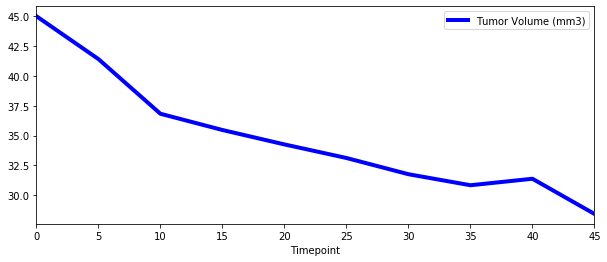

In [313]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# create df for capomuline 
capLine_df = merged.loc[merged["Drug Regimen"] == "Capomulin"]
capLine_df = capLine_df.reset_index()
# pull data for mouse m601
capMouse_df = capLine_df.loc[capLine_df["Mouse ID"] == "m601"]
# sort columns for line chart 
capMouse_df = capMouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# create lne graph of time vs volume 
capMouse_df.set_index('Timepoint').plot(figsize=(10, 4), lineWidth=4, color='blue')



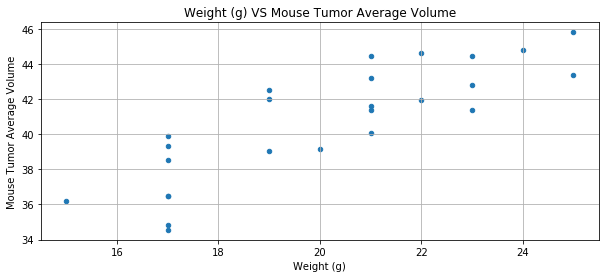

In [314]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# sort columns for scatter plot 
scatt_df = capLine_df.loc[:, ["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
# set up df for average for mouse tumor vol 
tumAvg = pd.DataFrame(scatt_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
# set new name for Tumor volume for chart title 
tumAvg = tumAvg.rename(columns={"Tumor Volume (mm3)": "Mouse Tumor Average Volume"})
# start formatting chart 
# create scatter plot 
tumAvg.plot(kind="scatter", x="Weight (g)",y = "Mouse Tumor Average Volume",grid =True, figsize=(10,4), title= "Weight (g) VS Mouse Tumor Average Volume")


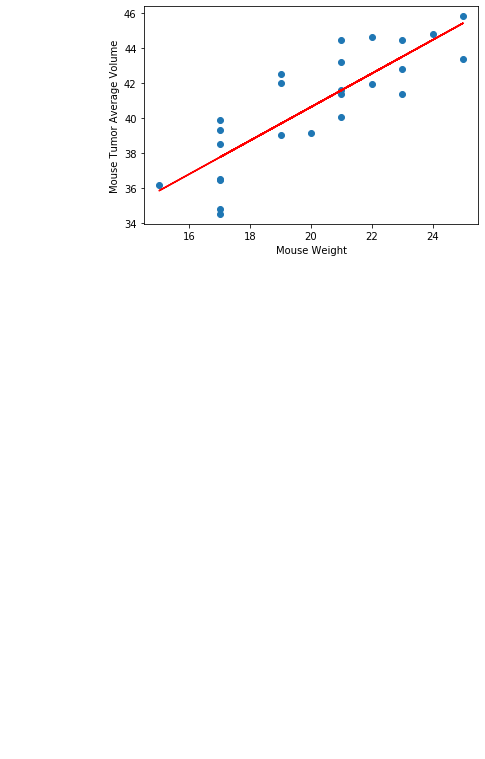

In [321]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x = tumAvg['Weight (g)']
x_values = tumAvg['Weight (g)']
y_values = tumAvg['Mouse Tumor Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),color="orange")
# format titles for chart 
plt.xlabel('Mouse Weight')
plt.ylabel('Mouse Tumor Average Volume')
plt.show()

